In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
from sklearn.exceptions import InconsistentVersionWarning

warnings.filterwarnings("ignore", category=InconsistentVersionWarning)


# Importing Data

In [3]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Understanding the dataset

In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crop.duplicated().sum()

0

In [8]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

# Density Plot of N, P, K

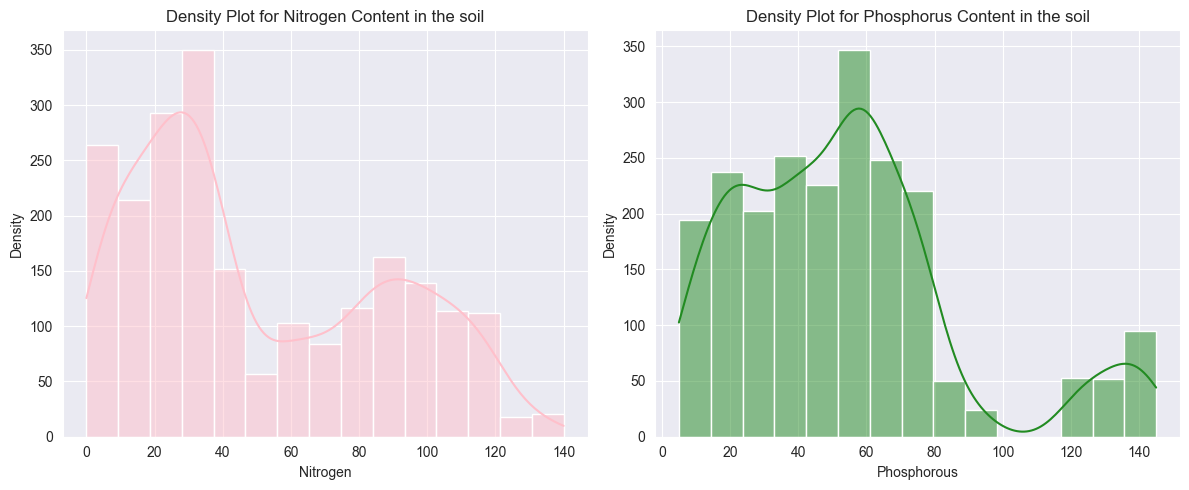

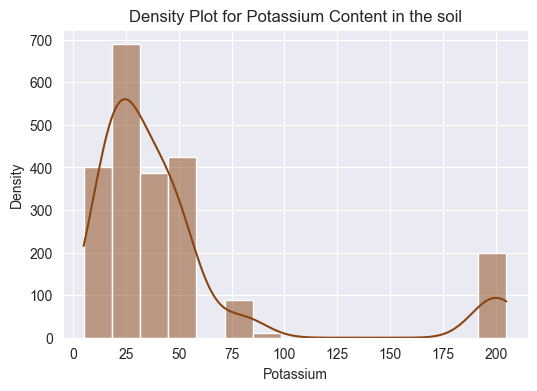

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

crop = pd.read_csv('Crop_recommendation.csv')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(crop['N'], color="pink", bins=15, kde=True, ax=axs[0])
axs[0].set_title('Density Plot for Nitrogen Content in the soil')
axs[0].set_xlabel('Nitrogen')
axs[0].set_ylabel('Density')

sns.histplot(crop['P'], color="forestgreen", bins=15, kde=True, ax=axs[1])
axs[1].set_title('Density Plot for Phosphorus Content in the soil')
axs[1].set_xlabel('Phosphorous')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.savefig('Density_Plots.tiff', dpi=300)
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(crop['K'], color="saddlebrown", bins=15, kde=True, alpha=0.5)
plt.title('Density Plot for Potassium Content in the soil')
plt.xlabel('Potassium')
plt.ylabel('Density')
plt.savefig('Density_Plot_for_Potassium_Content.tiff', dpi=300)
plt.show()



# Density plot of Temp, ph, rainfall, humidity

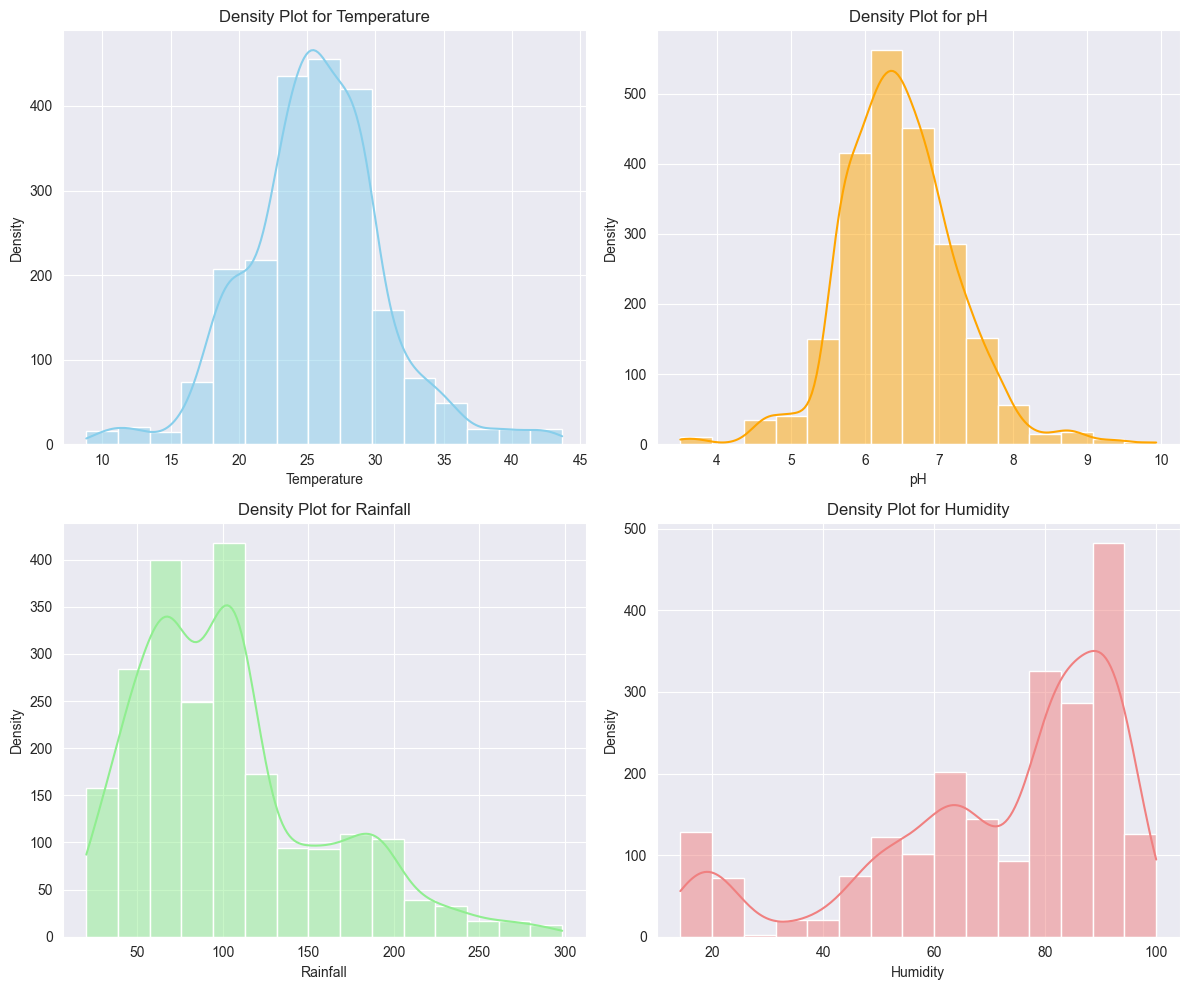

In [10]:
plt.figure(figsize=(12, 10))

# Density plot for Temperature
plt.subplot(221)
sns.histplot(crop['temperature'], color="skyblue", bins=15, kde=True)
plt.title('Density Plot for Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')

# Density plot for pH
plt.subplot(222)
sns.histplot(crop['ph'], color="orange", bins=15, kde=True)
plt.title('Density Plot for pH')
plt.xlabel('pH')
plt.ylabel('Density')

# Density plot for Rainfall
plt.subplot(223)
sns.histplot(crop['rainfall'], color="lightgreen", bins=15, kde=True)
plt.title('Density Plot for Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Density')

# Density plot for Humidity
plt.subplot(224)
sns.histplot(crop['humidity'], color="lightcoral", bins=15, kde=True)
plt.title('Density Plot for Humidity')
plt.xlabel('Humidity')
plt.ylabel('Density')

plt.tight_layout()
plt.savefig('Density_Plots_for_Weather_Variables.tiff', dpi=300)
plt.show()


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the type of crop
print(type(crop))

<class 'pandas.core.frame.DataFrame'>


In [12]:
numeric_crop = crop.select_dtypes(include=['number'])
corr = numeric_crop.corr()

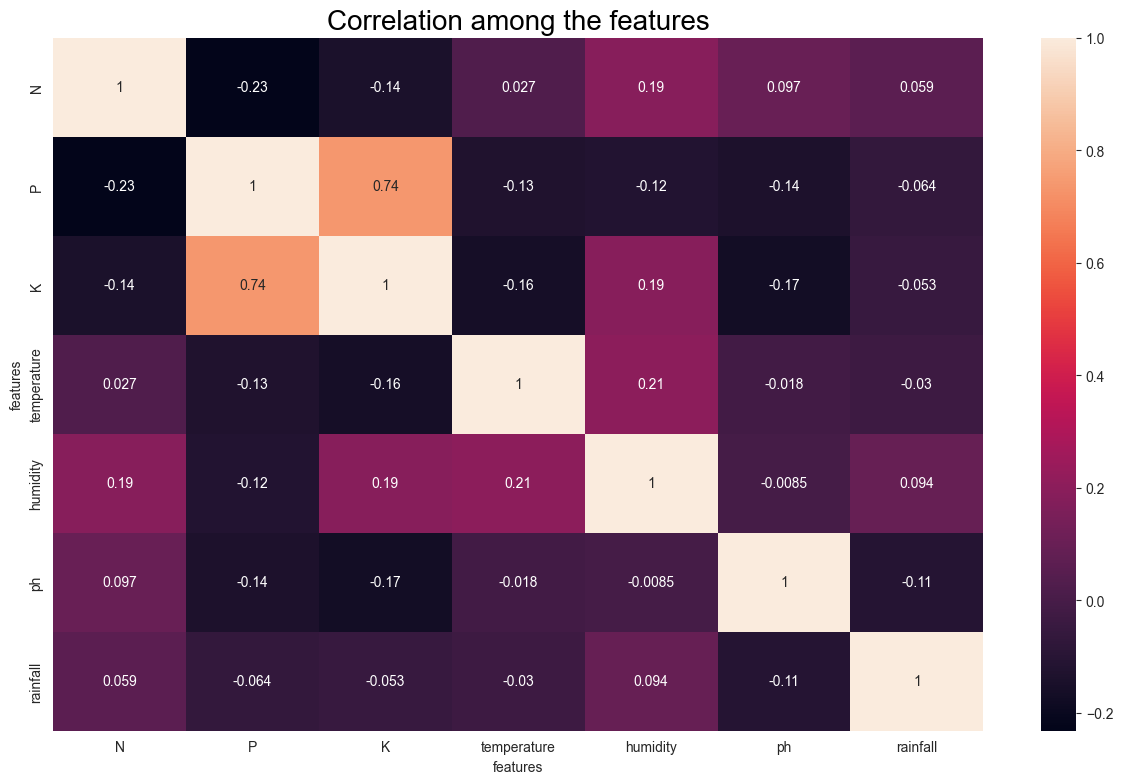

In [13]:
import seaborn as sns
fig, ax= plt.subplots(1,1, figsize=(15,9))
sns.heatmap(corr, annot=True)
ax.set(xlabel="features")
ax.set(ylabel="features")

plt.title("Correlation among the features", fontsize=20, c= "Black")
plt.savefig('Correlation among the features.tiff', dpi=300)
plt.show()

# Comparison between N , P , K values for different crops



In [14]:
crop_mean = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_mean.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [48]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_mean.index,
    y=crop_mean['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_mean.index,
    y=crop_mean['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_mean.index,
    y=crop_mean['K'],
    name='Potassium',
    marker_color='dodgerblue'
))


fig.update_layout(title="N-P-K values comparison among the crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

plt.savefig('N-P-K values comparision among the crops.tiff', dpi=300)
plt.show()

fig.show()

<Figure size 640x480 with 0 Axes>

# Frequency of each crop type 

In [16]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Encoding

In [17]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [18]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [19]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


# Train Test Split

In [20]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [21]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [22]:
y.shape

(2200,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(1760, 7)

In [26]:
X_test.shape

(440, 7)

In [27]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430



# Scale the features using MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [29]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

# Standarization

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

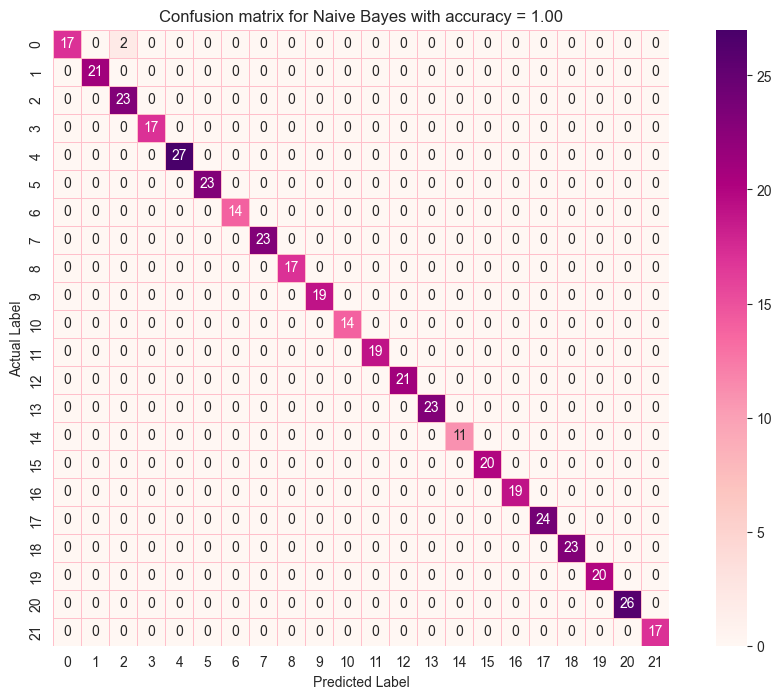

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X and y are defined and you have split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Fit the model on training data
naive_bayes.fit(X_train, y_train)

# Predict on test data
y_predict = naive_bayes.predict(X_test)

# Calculate confusion matrix and accuracy
cm_naive_bayes = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='RdPu', linecolor='pink', linewidths=0.5, square=True, ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for Naive Bayes with accuracy = {:.2f}".format(accuracy))
plt.savefig('Confusion_matrix_for_Naive_Bayes.tiff', dpi=300)
plt.show()


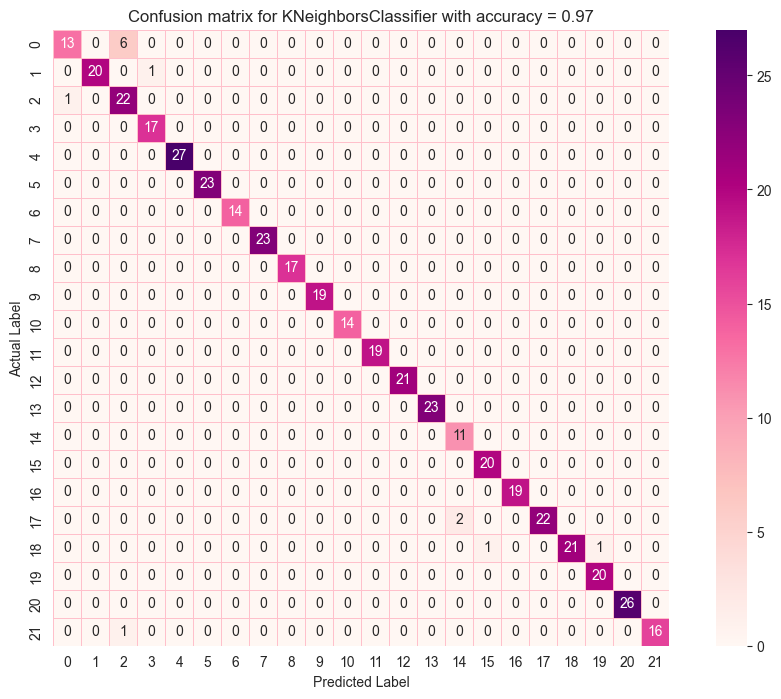

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are defined and you have split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate KNeighborsClassifier model
knn = KNeighborsClassifier()

# Fit the model on training data
knn.fit(X_train, y_train)

# Predict on test data
y_predict = knn.predict(X_test)

# Calculate confusion matrix and accuracy
cm_knn = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='RdPu', linecolor='pink', linewidths=0.5, square=True, ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for KNeighborsClassifier with accuracy = {:.2f}".format(accuracy))
plt.savefig('Confusion_matrix_for_KNeighborsClassifier.tiff', dpi=300)
plt.show()


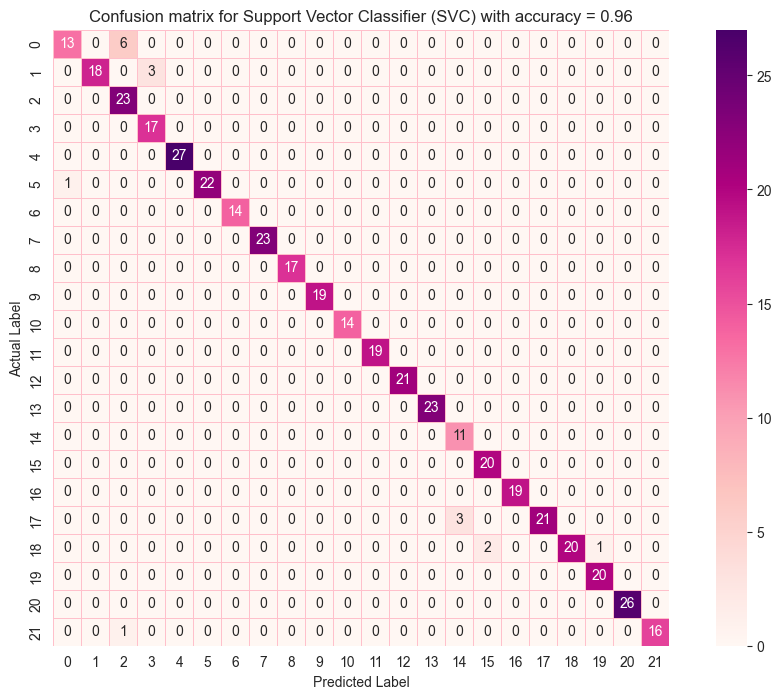

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming X and y are defined and you have split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Support Vector Classifier (SVC) model
svc = SVC()

# Fit the model on training data
svc.fit(X_train, y_train)

# Predict on test data
y_predict = svc.predict(X_test)

# Calculate confusion matrix and accuracy
cm_svc = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='RdPu', linecolor='pink', linewidths=0.5, square=True, ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for Support Vector Classifier (SVC) with accuracy = {:.2f}".format(accuracy))
plt.savefig('Confusion_matrix_for_Support_Vector_Classifier.tiff', dpi=300)
plt.show()


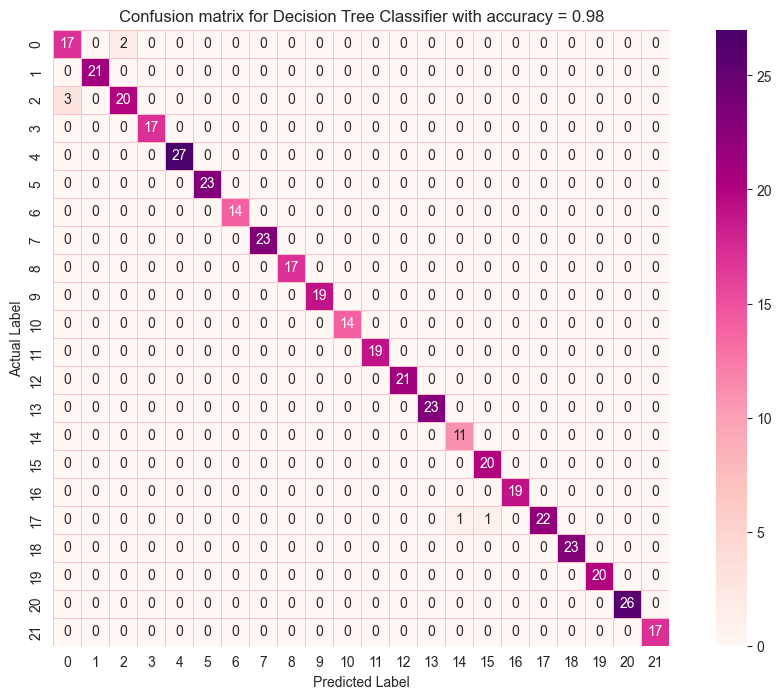

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are defined and you have split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Decision Tree Classifier model
dtc = DecisionTreeClassifier()

# Fit the model on training data
dtc.fit(X_train, y_train)

# Predict on test data
y_predict = dtc.predict(X_test)

# Calculate confusion matrix and accuracy
cm_dtc = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='RdPu', linecolor='pink', linewidths=0.5, square=True, ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for Decision Tree Classifier with accuracy = {:.2f}".format(accuracy))
plt.savefig('Confusion_matrix_for_Decision_Tree_Classifier.tiff', dpi=300)
plt.show()


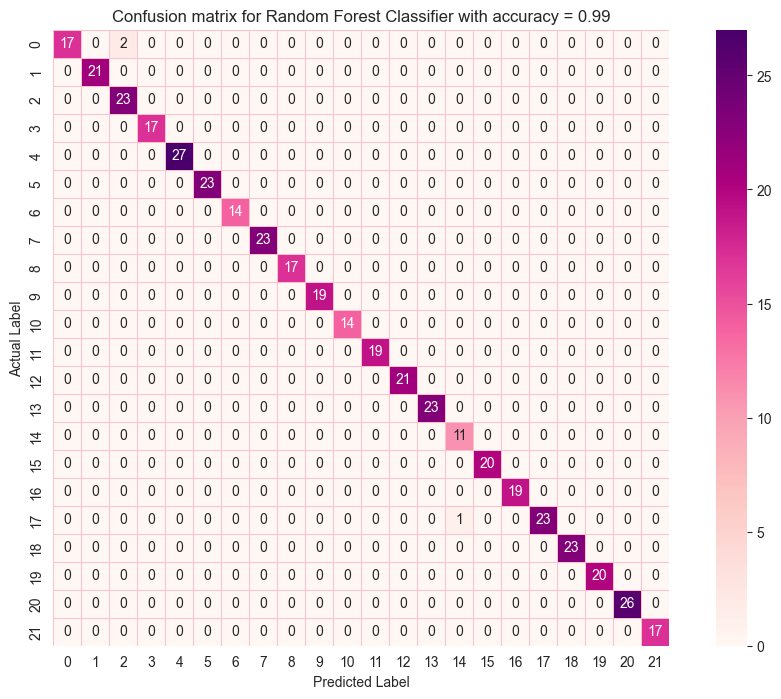

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are defined and you have split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate RandomForestClassifier model
rfc = RandomForestClassifier()

# Fit the model on training data
rfc.fit(X_train, y_train)

# Predict on test data
y_predict = rfc.predict(X_test)

# Calculate confusion matrix and accuracy
cm_rfc = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='RdPu', linecolor='pink', linewidths=0.5, square=True, ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion matrix for Random Forest Classifier with accuracy = {:.2f}".format(accuracy))
plt.savefig('Confusion_matrix_for_Random_Forest_Classifier.tiff', dpi=300)
plt.show()


# Training Models

In [37]:

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)

    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9613636363636363
K-Nearest Neighbors  with accuracy : 0.9704545454545455
Decision Tree  with accuracy : 0.9863636363636363
Random Forest  with accuracy : 0.9931818181818182


In [38]:
from sklearn.metrics import precision_score

# create instances of all models
models = {
    
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision score
    precision = precision_score(y_test, y_pred, average='weighted')

    print(f"{name} with precision: {precision}")


Naive Bayes with precision: 0.9958181818181817
Support Vector Machine with precision: 0.9672692837465565
K-Nearest Neighbors with precision: 0.9739764067350274
Decision Tree with precision: 0.986838023088023
Random Forest with precision: 0.9937348484848485


In [39]:
from sklearn.metrics import precision_score, recall_score

# create instances of all models
models = {
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision and recall scores
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"{name} with precision: {precision}, recall: {recall}")


Naive Bayes with precision: 0.9958181818181817, recall: 0.9954545454545455
Support Vector Machine with precision: 0.9672692837465565, recall: 0.9613636363636363
K-Nearest Neighbors with precision: 0.9739764067350274, recall: 0.9704545454545455
Decision Tree with precision: 0.986838023088023, recall: 0.9863636363636363
Random Forest with precision: 0.9937348484848485, recall: 0.9931818181818182


In [40]:
import pandas as pd

# Assuming you have the scores as lists
algorithm_names = ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.995, 0.961, 0.970, 0.981, 0.993]  
precision_scores = [0.995, 0.967, 0.973, 0.986, 0.993]
recall_scores =  [0.995, 0.961, 0.970, 0.986, 0.993]

# Create a DataFrame
data = {
    'Algorithm': algorithm_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}
df = pd.DataFrame(data)

# Set the Algorithm column as index
df.set_index('Algorithm', inplace=True)

# Display the DataFrame
print(df)


               Accuracy  Precision  Recall
Algorithm                                 
Naive Bayes       0.995      0.995   0.995
SVM               0.961      0.967   0.961
KNN               0.970      0.973   0.970
Decision Tree     0.981      0.986   0.986
Random Forest     0.993      0.993   0.993


In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

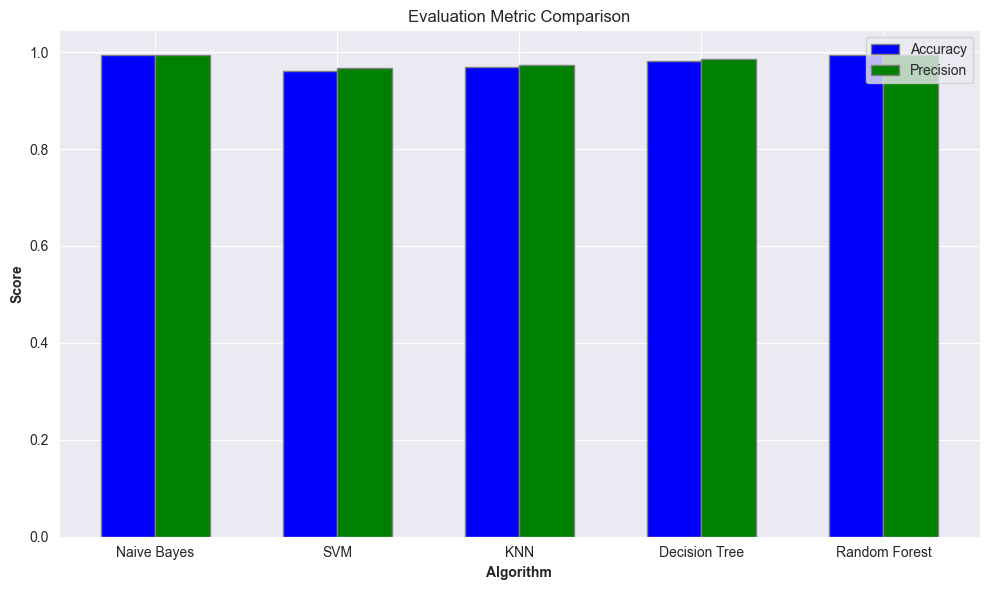

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the scores as lists
algorithm_names = ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.995, 0.961, 0.970, 0.981, 0.993]
precision_scores = [0.995, 0.967, 0.973, 0.986, 0.993]

# Set the width of the bars
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = np.arange(len(algorithm_names))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_scores, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_scores, color='g', width=bar_width, edgecolor='grey', label='Precision')

# Add labels, title, and legend
plt.xlabel('Algorithm', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(algorithm_names))], algorithm_names)
plt.ylabel('Score', fontweight='bold')
plt.title('Evaluation Metric Comparison')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# Predictive System

In [43]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [44]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Kidneybeans is a best crop to be cultivated 


/Users/shrutisinha/Major Project/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [45]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))